# WEEK 12 : SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION 

Sumber:
- https://www.youtube.com/watch?v=z69XYXpvVrE&ab_channel=IndonesiaBelajar

## Konsep Dasar

### Decision Boundary (Hyperplane)

Dibawah ini merupakan gambar dari contoh kasus klasifikasi yang terdiri dari 2 buah class yaitu class hitam dan class putih. 
Pada gambar ini juga terdapat 2 buah features yaitu X1(horizontal) dan X2(vertikal).

Pada kasus ini kita diminta untuk menarik garis lurus/garis linear untuk memisahkan kedua class ini. 
Pemisah atau garis lurus untuk memisahkan 2 class ini disebut juga dengan __Decision Boundary__

Misalkan terdapat 3 garis lurus yaitu H1, H2, dan H3. 
Dapat disimpulkan bahwa H3 merupakan garis lurus yang sangat baik untuk memisahkan kedua class. Hal ini dikarenakan H3 memiliki margin yang lebih besar dibandingkan dari H2 dan H1. 

Setiap decision boundaries yang telah ditentukan disebut juga dengan __HYPERPLANE__
SVM mencari decision boundary yang dapat memisahkan antar class dengan baik. 

![](SVM1.png)

### Maximum Margin

Margin ditentukan berdasarkan jarak terdekat antara decision boundary dengan anggota class yang ingin dipisahkan. 

Pada gambar dibawah ini, terdapat __class biru__ dan __class hijau.__ Kemudian terdapat 2 features yaitu X1 dan X2.
Pada kasus ini, terdapat decision boundary berupa garis linear berwarna merah yang digunakan untuk memisahkan kedua class yang dimiliki. 
Area yang diarsir berwarna kuning disebut dengan __margin__.

Margin diperoleh berdasarkan jarak terdekat antara decision boundary dengan anggota dari class yang ingin dipisahkan.

Setiap anggota kelas yang berperan untuk menentukan margin disebut juga dengan __support vector__
Pada kasus kali ini, terdapat 3 support vector (2 biru dan 1 hijau).
Support vector ini merupakan anggota dari class yang posisinya paling dekat dengan decision boundary. 
Dalam menentukan decision boundary, SVM akan memilih berdasarkan margin  terbesar atau disebut juga dengan __maximum margin__

![](SVM2.png)

### Linearly Inseperable & Kernel Tricks

Pada kasus di bawah ini terdapat kelas __titik__ dan kelas __X__.
Kemudian terdapat 2 buah features sehingga ketika dilakukan plotting, kita akan mendapatkan plotting 2 dimensi seperti pada gambar pertama.

Pada kasus kali ini tidak memungkinkan untuk membuat garis linear/decision boundary. Kondisi ini disebut juga dengan __linearly inseperable__
Untuk mengatasi masalah ini, maka SVM akan memproyeksikan data yang ada ke dimensi yang lebih tinggi. 

Jadi apabila data sebelumnya berada dalam 2 dimensi maka akan diubah menjadi 3 dimensi, seperti pada gambar 2.  

Kernel Tricks adalah suatu teknik untuk mengatasi kenaikan beban komputasi.
Terdapat beberapa jenis kernel yaitu polynomial, sigmoid, dan radial basis function. 

Pemanfaatan support vector dan kernel tricks untuk membentuk decision boundary inilah disebut juga __Support Vector Machine__. 

![](SVM3.png)

### Dataset: The MNIST database of handwritten digits
Referensi : 
- http://yann.lecun.com/exdb/mnist/

Pertama-tama menyiapkan dataset handwritten digits dengan cara mendownload datasetnya. 

Dapat dilihat untuk jumlah barisnya adalah 7000 dan jumlah kolomnya adalah 784. 

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

Menampilkan 8 baris pertama:

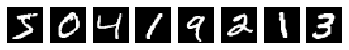

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

In [3]:
y[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

Membagi dataset ini menjadi training dan testing set, dan menggunakan keseluruhan data yang ada.  

In [7]:
#X_train = X[:60000]
#y_train = y[:60000]
#X_test = X[60000:]
#y_test = y[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]

### Classification dengan SVC (Support Vector Classifier) 

Disini kita akan menerapkan SVC untuk melakukan classification pada data numerik berdasarkan dataset yang kita miliki. 

Langkah-langkah:
- Mengimport modul SVC
- Bentuk objek dari modelnya dengan parameter random_state = 0  dan ditampung ke dalam variable 'model'
- Model ini akan ditraining dengan memanggil method fit 

In [8]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6806
           1       0.95      0.97      0.96      7761
           2       0.89      0.91      0.90      6891
           3       0.93      0.82      0.87      7048
           4       0.88      0.91      0.90      6719
           5       0.82      0.90      0.86      6221
           6       0.95      0.92      0.94      6782
           7       0.91      0.92      0.92      7176
           8       0.91      0.84      0.87      6738
           9       0.85      0.88      0.86      6858

    accuracy                           0.91     69000
   macro avg       0.91      0.90      0.90     69000
weighted avg       0.91      0.91      0.91     69000



### Hyperparameter Tuning dengan GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   47.9s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [11]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

Best Score: 0.907
Best Parameters:
	kernel: rbf
	C: 10
	gamma: scale


### Predict and Evaluate

In [12]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6806
           1       0.96      0.97      0.97      7761
           2       0.90      0.93      0.91      6891
           3       0.92      0.84      0.88      7048
           4       0.92      0.91      0.91      6719
           5       0.86      0.90      0.88      6221
           6       0.95      0.94      0.94      6782
           7       0.92      0.92      0.92      7176
           8       0.91      0.85      0.88      6738
           9       0.85      0.90      0.88      6858

    accuracy                           0.91     69000
   macro avg       0.91      0.91      0.91     69000
weighted avg       0.91      0.91      0.91     69000

